# MNIST

## Data Download

In [6]:
!cd ../benchmark/datasets/mnist && mkdir -pv data/raw

9913344it [00:53, 185842.33it/s]                                                
Extracting data/raw/raw/MNIST/raw/train-images-idx3-ubyte.gz to data/raw/raw/MNIST/raw

29696it [00:00, 8071154.20it/s]                                                 
Extracting data/raw/raw/MNIST/raw/train-labels-idx1-ubyte.gz to data/raw/raw/MNIST/raw

1649664it [00:09, 172234.61it/s]                                                
Extracting data/raw/raw/MNIST/raw/t10k-images-idx3-ubyte.gz to data/raw/raw/MNIST/raw

5120it [00:00, 17718511.95it/s]                                                 
Extracting data/raw/raw/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/raw/raw/MNIST/raw

Processing...
/Users/densechen/miniconda3/envs/openfed/lib/python3.7/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You

### Valid dataset

In [1]:
from benchmark.datasets.mnist import get_mnist
from torchvision.transforms import ToTensor

dataset = get_mnist('../benchmark/datasets/mnist/data/', total_parts=100)

x, y = dataset[0]

print(x.shape, y.shape)

torch.Size([1, 28, 28]) torch.Size([])


## FedAvg

In [ ]:
!python -m openfed.tools.simulator --nproc 11 --logdir /tmp/ ../main.py\
    --task mnist\
    --data_root ../benchmark/datasets/mnist/data\
    --partition dirichlet\
    --partition_args alpha:100.0\
    --num_parts 1000\
    --epochs 1\
    --rounds 200\
    --act_clts 30\
    --tst_act_clts 30\
    --max_acg_step -1\
    --optim fedavg\
    --optim_args momentum:0.9 weight_decay:1e-4\
    --co_lr 0.1\
    --ag_lr 1.0\
    --bz 100\
    --gpu\
    --log_dir logs\
    --exp_name fedavg_dirichlet_mnist\
    --seed 0

Note: Stdout and stderr for collaborator-1 will be written to /tmp/openfed_node_collaborator-1_stdout, /tmp/openfed_node_collaborator-1_stderr respectively.
Note: Stdout and stderr for collaborator-2 will be written to /tmp/openfed_node_collaborator-2_stdout, /tmp/openfed_node_collaborator-2_stderr respectively.
Note: Stdout and stderr for collaborator-3 will be written to /tmp/openfed_node_collaborator-3_stdout, /tmp/openfed_node_collaborator-3_stderr respectively.
Note: Stdout and stderr for collaborator-4 will be written to /tmp/openfed_node_collaborator-4_stdout, /tmp/openfed_node_collaborator-4_stderr respectively.
Note: Stdout and stderr for collaborator-5 will be written to /tmp/openfed_node_collaborator-5_stdout, /tmp/openfed_node_collaborator-5_stderr respectively.
Note: Stdout and stderr for collaborator-6 will be written to /tmp/openfed_node_collaborator-6_stdout, /tmp/openfed_node_collaborator-6_stderr respectively.
Note: Stdout and stderr for collaborator-7 will be written

## FedAvg, FedSGD, FedEla, FedProx, FedScaffold

Run following commands in the root path of `benchmark-lightly`.

In [11]:
! rm -rf /tmp/fedavg_dirichlet_mnist.share\
! rm -rf /tmp/fedavg_dirichlet_mnist\
! rm -rf ./logs/mnist_dirichlet/fedavg\

! cd .. && python -m openfed.tools.launch --nproc_per_node 6  --logdir /tmp benchmark/run.py\
    --fed_init_method file:///tmp/fedavg_dirichlet_mnist.share\
    --task mnist\
    --data_root benchmark/datasets/mnist/data\
    --partition dirichlet\
    --partition_args alpha:100.0\
    --num_parts 1000\
    --epochs 1\
    --rounds 20\
    --act_clts 10\
    --tst_act_clts -1\
    --max_acg_step -1\
    --optim fedavg\
    --optim_args momentum:0.9 weight_decay:1e-4\
    --follower_lr 0.1\
    --leader_lr 1.0\
    --bz 100\
    --gpu\
    --log_level SUCCESS\
    --log_dir logs\
    --exp_name fedavg_dirichlet_mnist\
    --seed 0\

/Users/densechen/miniconda3/envs/openfed/lib/python3.7/site-packages/openfed-0.0.0-py3.7.egg/openfed/third_party/mmcv/__init__.py:13: UserWarning: `openfed.third_party.mmcv` module requires `mmcv` package, but not found. You can install it from https://github.com/open-mmlab/mmcv.
*****************************************
Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
*****************************************
Note: Stdout and stderr for node 0 rank 1 will
                be written to /tmp/openfed_node_0_local_rank_1_stdout, /tmp/openfed_node_0_local_rank_1_stderr respectively.
Note: Stdout and stderr for node 0 rank 2 will
                be written to /tmp/openfed_node_0_local_rank_2_stdout, /tmp/openfed_node_0_local_rank_2_stderr respectively.
Note: Stdout and stderr for node 0 rank 3 will
                be written to /tmp

<Round: 3> train: 100%|█████████████████████████| 10/10 [00:02<00:00,  3.78it/s]
2021-08-26 19:44:40.745 | SUCCESS  | openfed.hooks.step.aggregate:aggregate:128 - <OpenFed> TaskInfo
+-----------+-------+---------+----------+------+----------+-------------+
| instances |  mode | version | accuracy | loss | duration | duration... |
+-----------+-------+---------+----------+------+----------+-------------+
|    593    | train |    3    |   0.65   | 1.84 |   0.01   |     0.00    |
+-----------+-------+---------+----------+------+----------+-------------+

<Round: 3> test: 100%|████████████████████████████| 5/5 [00:01<00:00,  2.63it/s]
2021-08-26 19:44:42.905 | SUCCESS  | openfed.hooks.step.aggregate:aggregate:128 - <OpenFed> TaskInfo
+-----------+------+---------+----------+------+----------+-------------+
| instances | mode | version | accuracy | loss | duration | duration... |
+-----------+------+---------+----------+------+----------+-------------+
|   60000   | test |    3    |   0.70 

<Round: 9> test: 100%|████████████████████████████| 5/5 [00:01<00:00,  2.76it/s]
2021-08-26 19:45:11.522 | SUCCESS  | openfed.hooks.step.aggregate:aggregate:128 - <OpenFed> TaskInfo
+-----------+------+---------+----------+------+----------+-------------+
| instances | mode | version | accuracy | loss | duration | duration... |
+-----------+------+---------+----------+------+----------+-------------+
|   60000   | test |    9    |   0.82   | 0.70 |   1.00   |     0.00    |
+-----------+------+---------+----------+------+----------+-------------+

<Round: 10> train: 100%|████████████████████████| 10/10 [00:02<00:00,  4.09it/s]
2021-08-26 19:45:14.090 | SUCCESS  | openfed.hooks.step.aggregate:aggregate:128 - <OpenFed> TaskInfo
+-----------+-------+---------+----------+------+----------+-------------+
| instances |  mode | version | accuracy | loss | duration | duration... |
+-----------+-------+---------+----------+------+----------+-------------+
|    588    | train |    10   |   0.83  

<Round: 16> train: 100%|████████████████████████| 10/10 [00:02<00:00,  4.08it/s]
2021-08-26 19:45:42.586 | SUCCESS  | openfed.hooks.step.aggregate:aggregate:128 - <OpenFed> TaskInfo
+-----------+-------+---------+----------+------+----------+-------------+
| instances |  mode | version | accuracy | loss | duration | duration... |
+-----------+-------+---------+----------+------+----------+-------------+
|    593    | train |    16   |   0.86   | 0.54 |   0.01   |     0.00    |
+-----------+-------+---------+----------+------+----------+-------------+

<Round: 16> test: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.79it/s]
2021-08-26 19:45:44.515 | SUCCESS  | openfed.hooks.step.aggregate:aggregate:128 - <OpenFed> TaskInfo
+-----------+------+---------+----------+------+----------+-------------+
| instances | mode | version | accuracy | loss | duration | duration... |
+-----------+------+---------+----------+------+----------+-------------+
|   60000   | test |    16   |   0.84 

### Run All

In [5]:
 cmd 'fedsgd'; cmd 'fedela'; cmd 'fedprox'; cmd 'fedscaffold'

zsh:1: command not found: cmd


## Plot Curves

In [1]:
%matplotlib inline

from benchmark.utils.plot import plot

partition = "dirichlet"
task_name = "mnist"

items = dict(
    FedAvg=f'../logs/{task_name}/fedavg_{partition}_{task_name}/{task_name}.json',
    FedSgd=f'../logs/{task_name}/fedsgd_{partition}_{task_name}/{task_name}.json',
    FedEla=f'../logs/{task_name}/fedela_{partition}_{task_name}/{task_name}.json',
    FedProx=f'../logs/{task_name}/fedprox_{partition}_{task_name}/{task_name}.json',
    FedScaffold=f'../logs/{task_name}/fedscaffold_{partition}_{task_name}/{task_name}.json',
)

files = items.values()
labels = items.keys()

### Train Accuracy

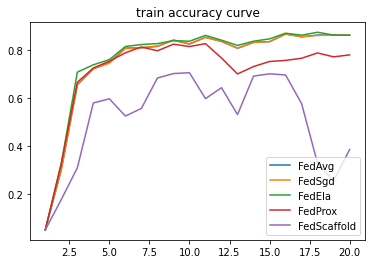

In [2]:
plot(
    files=files,
    labels=labels,
    attributes="accuracy",
    mode='train'
)

### Train Loss

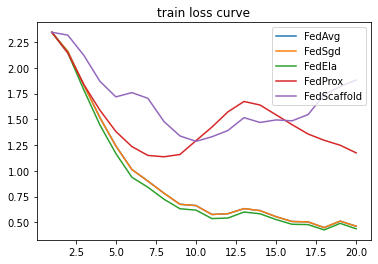

In [3]:
plot(
    files=files,
    labels=labels,
    attributes="loss",
    mode="train"
)

### Test Accuracy

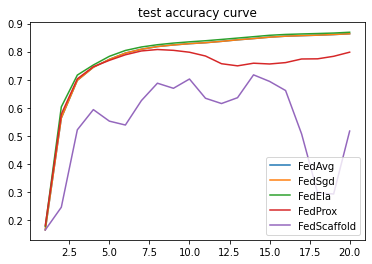

In [4]:
plot(
    files=files,
    labels=labels,
    attributes="accuracy",
    mode="test"
)

### Test Loss

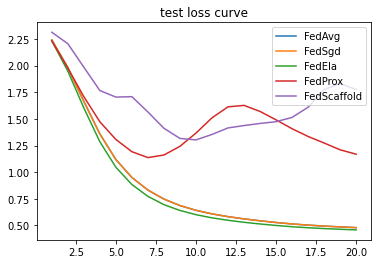

In [5]:
plot(
    files=files,
    labels=labels,
    attributes="loss",
    mode='test'
)